In [8]:
import numpy as np
from macpp import MACPPAgent, MACPP
from maf import Grid
import matplotlib.pyplot as plt
import json
from matplotlib import colors
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


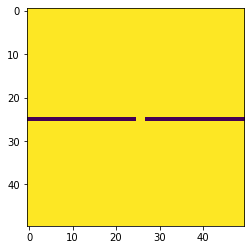

In [35]:
l,b=50,50
grid=np.zeros((l,b))
grid[int(l/2),:]=-1
grid[int(l/2),int(b/2)]=0
grid[int(l/2),int(b/2)+1]=0
plt.imshow(grid)

In [36]:
#g=Grid('new_map.json')
#grid=g.return_grid()
m=MACPP(grid,4)
agents=[]
n=20
#randomize start points in every experiment
x,y=m.convert(0,0)
#print(m.n*x+y)
crds=np.ones(n)*(m.n*x+y)
for i in range(n):
    agents.append(MACPPAgent(0,0,i,m))
    
coverage_percentage=[]

In [37]:
len(m.graph)

2452

In [38]:
i=0
while m.marked_visited()<1:
    if agents[i%n].state():
        crds[i%n]=agents[i%n].next(crds)
        '''
        for n number of agents
        run=[[]*n]
        to record x and y coodinates of agents
        x,y=agent[i%n].x,agent[i%n].y
        run[i].append([x,y])
        '''
    i+=1
    if i%n==0:
        print(i%n,m.covered(),end=' | ')
        coverage_percentage.append(m.covered())

0 0.0004078303425774878 | 0 0.0012234910277324632 | 0 0.0024469820554649264 | 0 0.004078303425774877 | 0 0.006117455138662317 | 0 0.008564437194127243 | 0 0.011419249592169658 | 0 0.01468189233278956 | 0 0.01835236541598695 | 0 0.022430668841761828 | 0 0.026916802610114192 | 0 0.03181076672104405 | 0 0.03711256117455139 | 0 0.042822185970636216 | 0 0.048939641109298535 | 0 0.05546492659053834 | 0 0.06239804241435563 | 0 0.06973898858075041 | 0 0.07748776508972267 | 0 0.08564437194127243 | 0 0.09380097879282219 | 0 0.10195758564437195 | 0 0.11011419249592169 | 0 0.11827079934747145 | 0 0.1264274061990212 | 0 0.13458401305057097 | 0 0.14274061990212072 | 0 0.15089722675367048 | 0 0.15905383360522024 | 0 0.16721044045676997 | 0 0.17536704730831973 | 0 0.1835236541598695 | 0 0.19168026101141925 | 0 0.199836867862969 | 0 0.20799347471451876 | 0 0.21615008156606852 | 0 0.22430668841761828 | 0 0.23246329526916804 | 0 0.2406199021207178 | 0 0.24877650897226752 | 0 0.2569331158238173 | 0 0.2650

## Number of timesteps to cover the map

In [41]:
#number of timesteps to cover the map
len(coverage_percentage)

227

## fraction of map covered vs timesteps

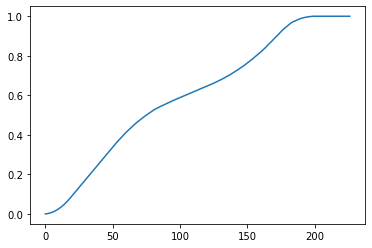

In [34]:
plt.plot(coverage_percentage)

### Cells marked visited by each agent

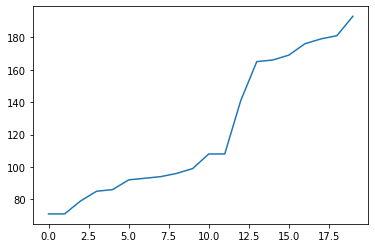

In [20]:
plt.plot(np.sort(crds))

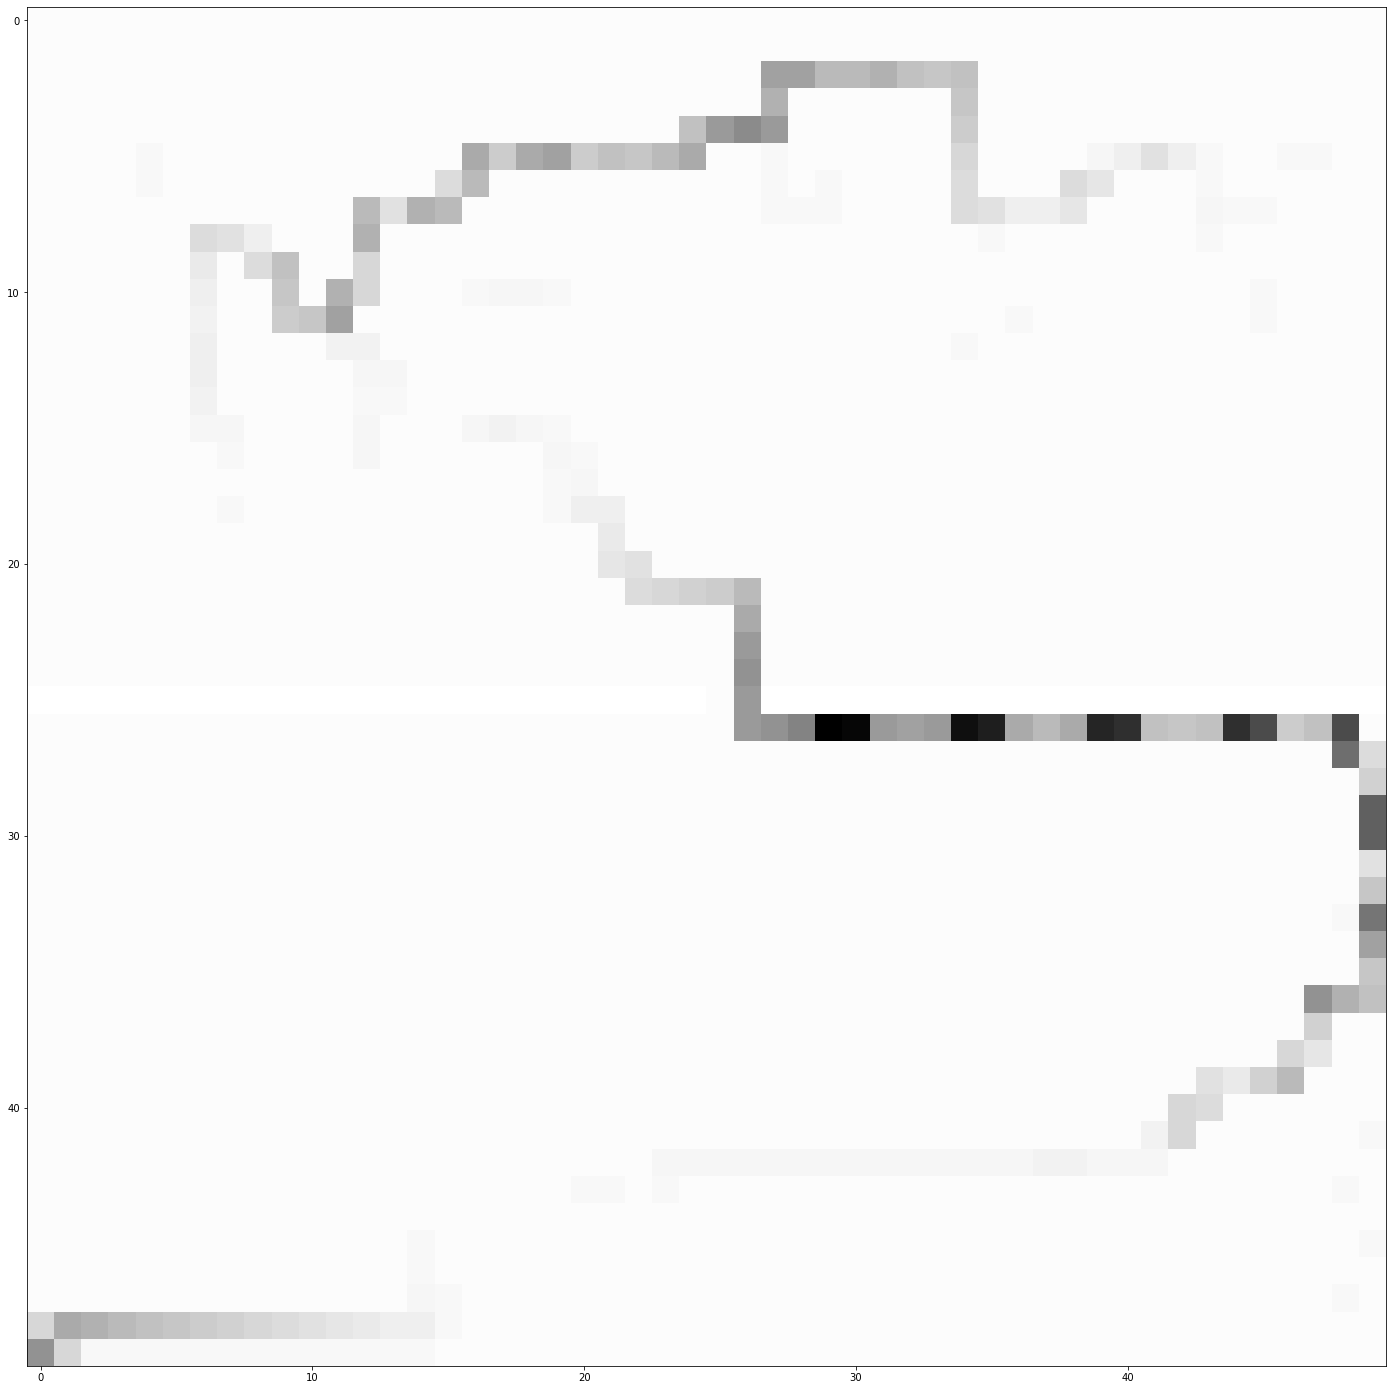

In [40]:
plt.figure(figsize=(25,25))
#mask = np.ma.masked_greater(grid,1)
#plt.imshow(grid)
plt.imshow(m.visit_frequency,cmap='Greys')
#plt.imshow(grid)

Note: %age of cells covered once, twice, thrice, 4,5,..n times can be calculated withvisitation frequency map